In [1]:
import pandas as pd
import featurewiz 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

Imported 0.2.04 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



<hr>


#### Data Preprocessing

In [2]:
data=pd.read_csv("datasets/final_feature_extracted.csv")

In [3]:
data.head()

,Domain_Name,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain_Name    10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix_Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Domain_Age     10000 non-null  int64 
 11  End_Domain     10000 non-null  int64 
 12  iFrame         10000 non-null  int64 
 13  Mouse_Over     10000 non-null  int64 
 14  Right_Click    10000 non-null  int64 
 15  Web_Forwards   10000 non-null  int64 
 16  label          10000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 1.3+ MB


In [5]:
data.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


In [6]:
data.shape

(10000, 17)

In [7]:
data.isnull().sum()

Domain_Name      0
Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix_Suffix    0
DNS_Record       0
Domain_Age       0
End_Domain       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
label            0
dtype: int64

In [8]:
data[data.duplicated()]

,Domain_Name,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
14,thenextweb.com,0,0,1,6,0,0,0,0,0,0,0,0,0,1,0,0
19,allegro.pl,0,0,1,2,0,0,0,0,0,1,1,0,0,1,1,0
28,mic.com,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
30,emgn.com,0,0,1,2,0,0,0,0,0,0,0,1,1,1,1,0
35,nypost.com,0,0,1,4,0,0,1,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9993,sparkpassedecom.com,0,0,0,2,0,0,0,0,0,1,1,0,0,1,0,1
9995,wvk12-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1
9996,adplife.com,0,0,1,4,0,0,0,0,0,0,1,0,0,1,0,1
9998,norcaltc-my.sharepoint.com,0,0,1,5,0,0,1,1,0,1,1,0,0,1,0,1


In [9]:
data=data.drop_duplicates()
data=data.drop(columns="Domain_Name",axis=1)

In [10]:
data

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix_Suffix,DNS_Record,Domain_Age,End_Domain,iFrame,Mouse_Over,Right_Click,Web_Forwards,label
0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0
3,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
9991,0,0,0,3,0,0,0,0,0,1,1,0,0,1,0,1
9992,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
9994,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1


In [11]:
x=data.iloc[:,:15]
y=data.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

In [12]:
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [13]:
y['label'].unique()

array([0, 1], dtype=int64)

In [14]:
dtree = DecisionTreeRegressor()
rfecv = RFECV(estimator=dtree, step=1, scoring="neg_mean_squared_error", cv=4, verbose=1,n_jobs = 4)
rfecv.fit(x, y)
rfecv.transform(x)
print(rfecv)
print(rfecv.n_features_)
print(np.where(rfecv.support_ == False)[0]) 

Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
RFECV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=4,
      scoring='neg_mean_squared_error', verbose=1)
1
[ 0  1  3  4  5  6  7  8  9 10 11 12 13 14]


In [15]:
rf = RandomForestClassifier(n_estimators=200, random_state=1, max_depth=4)
rf.fit(x_train, y_train)
print('Train set')
pred = rf.predict(x_train)
print('Random Forests accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set')
pred = rf.predict(x_test)
print('Random Forests accuracy: {}'.format(accuracy_score(y_test,pred)))


Train set
Random Forests accuracy: 0.878622668579627
Test set
Random Forests accuracy: 0.8784403669724771


In [18]:
from featurewiz import featurewiz
target = 'label'
feats = featurewiz(data, target, corr_limit=0.9, verbose=0)
len(feats)
print(feats[0])

############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
featurewiz has selected 0.9 as the correlation limit. Change this limit to fit your needs...
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (4357, 16)
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
############################################

<hr>

#### Feature Selection

* Filter Methods
* Wrapper Methods

##### Filter methods

In [19]:
#Variance Threshhold
constant_filter = VarianceThreshold(threshold=0)

#Fit and transforming on train data
data_constant = constant_filter.fit_transform(x_train)
print(data_constant.shape)

#Extracting all constant columns using get support function of our filter
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]

#No. of constant columns
print(len(constant_columns))

#Constant columns names:
for column in constant_columns:
    print(column)

(3485, 15)
0


In [21]:
qcons_filter = VarianceThreshold(threshold=0.01)

#Fit and transforming on train data
data_qcons = qcons_filter.fit_transform(x_train)
print(data_qcons.shape)

#Extracting all Quasi constant columns using get support function of our filter
qcons_columns = [column for column in x_train.columns
                    if column not in x_train.columns[qcons_filter.get_support()]]

#No. of Quasi constant columns
print(len(qcons_columns))

#Quasi Constant columns names:
for column in qcons_columns:
    print(column)

(3485, 13)
2
https_Domain
Right_Click


In [22]:
columns=["Have_IP","https_Domain","Right_Click"]

In [23]:
# Corelation Filtering
corr=data.corr()["label"]
corr

Have_IP          0.038400
Have_At          0.056359
URL_Length      -0.333976
URL_Depth       -0.149500
Redirection     -0.040009
https_Domain     0.007966
TinyURL          0.021681
Prefix_Suffix    0.154764
DNS_Record      -0.006906
Domain_Age      -0.105275
End_Domain      -0.027308
iFrame           0.066984
Mouse_Over       0.054312
Right_Click     -0.012600
Web_Forwards    -0.071099
label            1.000000
Name: label, dtype: float64

<AxesSubplot: >

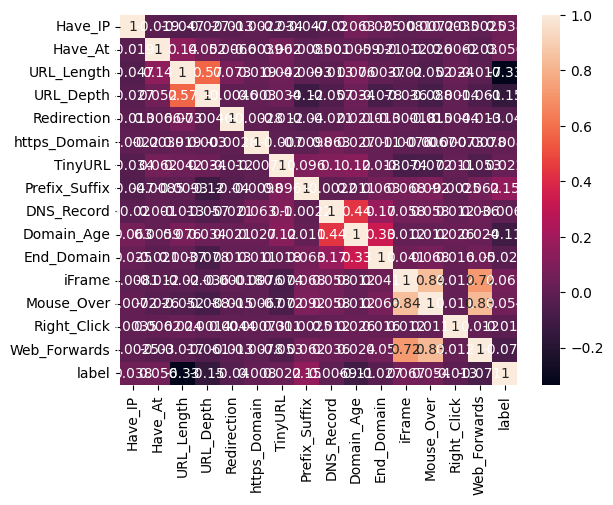

In [24]:
sns.heatmap(data.corr(method='pearson'),annot=True)

In [25]:
def correlation(dataset,threshold):
    col_corr=set() # set will contains unique values.
    corr_matrix=dataset.corr() #finding the correlation between columns.
    for i in range(len(corr_matrix.columns)): #number of columns
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold: #checking the correlation between columns.
                colName=corr_matrix.columns[i] #getting the column name
                col_corr.add(colName) #adding the correlated column name heigher than threshold value.
    return col_corr #returning set of column names


scol=correlation(x,0.7)
print('Correlated columns:',scol)
print(len(scol))

Correlated columns: {'Web_Forwards', 'Mouse_Over'}
2


In [26]:
columns.extend(['Mouse_Over', 'Web_Forwards'])

In [27]:
model_chi2 =SelectKBest(chi2,k=5)
res=model_chi2.fit(x_train,y_train)
cols=model_chi2.get_support(indices=True)
new_features =x_train.iloc[:,cols]
new_features


,URL_Length,URL_Depth,Prefix_Suffix,Domain_Age,Web_Forwards
5973,1,5,1,1,0
7239,0,3,0,0,0
1017,1,4,0,1,0
9343,0,2,0,0,0
9805,0,2,0,0,1
...,...,...,...,...,...
9671,0,2,0,0,0
6504,1,5,0,0,0
1471,1,2,0,0,1
126,1,3,0,1,0


In [28]:
columns

['Have_IP', 'https_Domain', 'Right_Click', 'Mouse_Over', 'Web_Forwards']

##### Wrapper Methods

In [29]:
# RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(data.iloc[:,:15], data.iloc[:,15])
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
res=[]
for i,j in zip(data.columns,fit.support_):
  if j==True:
    res.append(i)
print(res)

Num Features: 7
Selected Features: [ True  True  True False False False False  True False False False  True
  True False  True]
Feature Ranking: [1 1 1 6 9 3 7 1 4 2 8 1 1 5 1]
['Have_IP', 'Have_At', 'URL_Length', 'Prefix_Suffix', 'iFrame', 'Mouse_Over', 'Web_Forwards']


In [30]:
#Forward Feature Selection
#importing the necessary libraries
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
import sklearn.externals as extjoblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=7,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
sfs.fit(x_train, y_train)
sfs.k_feature_names_     

('Have_At',
 'URL_Length',
 'Prefix_Suffix',
 'Domain_Age',
 'iFrame',
 'Mouse_Over',
 'Web_Forwards')

Index(['Right_Click', 'https_Domain', 'Have_IP', 'Redirection', 'DNS_Record'], dtype='object')

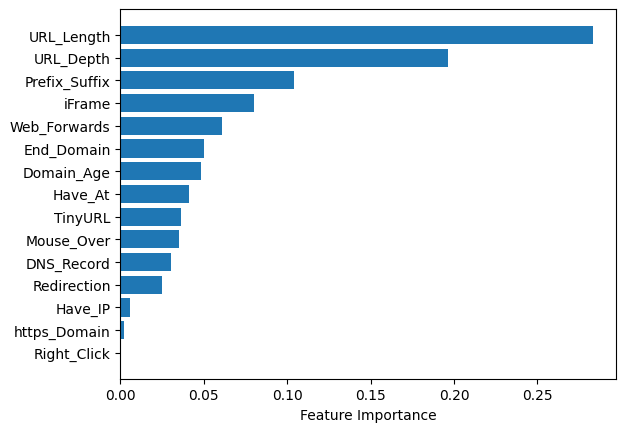

In [31]:
#Feature Importance
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=150)
rf.fit(x_train, y_train)
sort = rf.feature_importances_.argsort()
plt.barh(data.columns[sort], rf.feature_importances_[sort])
plt.xlabel("Feature Importance")

# print(data.columns[sort])
cols=data.columns[sort][:5]
cols

Feature: 0, Score: 0.007099804500441634
Feature: 1, Score: 0.03924079804598475
Feature: 2, Score: 0.3141750713403273
Feature: 3, Score: 0.16276569708512942
Feature: 4, Score: 0.02483737275013511
Feature: 5, Score: 0.00196703000411608
Feature: 6, Score: 0.030835064042067917
Feature: 7, Score: 0.11517411923074343
Feature: 8, Score: 0.024619816238946827
Feature: 9, Score: 0.052595854250068165
Feature: 10, Score: 0.041514437538588515
Feature: 11, Score: 0.1123697099030685
Feature: 12, Score: 0.01300065357081161
Feature: 13, Score: 0.00010475226886235415
Feature: 14, Score: 0.059699819230708356


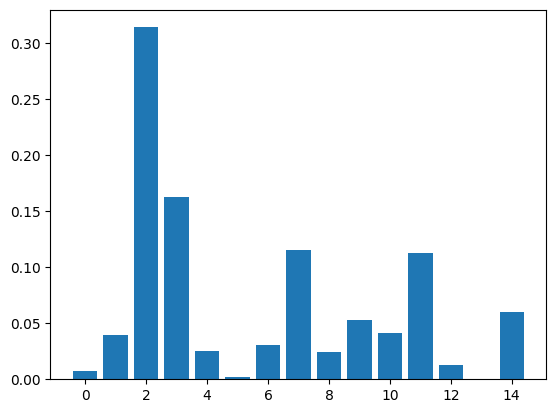

In [32]:
#decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(x_train, y_train)
# get importance
importance = model.feature_importances_

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}'.format(i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
cols

Index(['Right_Click', 'https_Domain', 'Have_IP', 'Redirection', 'DNS_Record'], dtype='object')

In [34]:
data.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix_Suffix', 'DNS_Record', 'Domain_Age',
       'End_Domain', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',
       'label'],
      dtype='object')

In [35]:
#Dropping the columns
data=data.drop(columns=cols,axis=1)

In [36]:
data.columns

Index(['Have_At', 'URL_Length', 'URL_Depth', 'TinyURL', 'Prefix_Suffix',
       'Domain_Age', 'End_Domain', 'iFrame', 'Mouse_Over', 'Web_Forwards',
       'label'],
      dtype='object')

In [37]:
print(data.shape)
x=data.iloc[:,:10]
y=data.iloc[:,10]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=100)

(4357, 11)


In [42]:
rf1 = RandomForestClassifier(n_estimators=20, random_state=1, max_depth=4)
rf1.fit(x_train, y_train)
print('Train set')
pred = rf1.predict(x_train)
print('Random Forests accuracy: {}'.format(accuracy_score(y_train,pred)))
print('Test set')
pred = rf1.predict(x_test)
print('Random Forests accuracy: {}'.format(accuracy_score(y_test,pred)))
  

Train set
Random Forests accuracy: 0.88493543758967
Test set
Random Forests accuracy: 0.8841743119266054


In [45]:
data

,Have_At,URL_Length,URL_Depth,TinyURL,Prefix_Suffix,Domain_Age,End_Domain,iFrame,Mouse_Over,Web_Forwards,label
0,0,1,1,0,0,1,1,0,0,0,0
1,0,1,1,0,0,1,1,0,0,0,0
2,0,1,1,0,0,0,1,0,0,0,0
3,0,1,3,0,0,0,1,0,0,0,0
4,0,1,3,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9990,0,0,0,0,0,0,1,0,0,0,1
9991,0,0,3,0,0,1,1,0,0,0,1
9992,0,0,0,1,0,0,0,0,0,0,1
9994,0,1,1,0,0,0,0,0,0,0,1


In [44]:
# Storing the data in CSV file
data.to_csv('sample.csv', index=False)